<a href="https://colab.research.google.com/github/maorisraelii/twitter-sentiment-analysis/blob/main/twitter_sentiment_analysis_and_Stock_prediction_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import the yfinance, pandas, and Google Colab libraries.
import yfinance as yf
import pandas as pd
from google.colab import drive

# Import the re, emoji, and pandas libraries.
import re
!pip install emoji
import emoji
import pandas as pd

# Import the WordCloud, STOPWORDS, and matplotlib.pyplot libraries.
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Import the TextBlob and matplotlib.pyplot libraries.
from textblob import TextBlob
import matplotlib.pyplot as plt

# Import the StandardScaler, MinMaxScaler, and numpy libraries.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Import the tensorflow and keras libraries.
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D, Flatten
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, Bidirectional
from keras.layers import Dense, Dropout

# Import the mean_squared_error, mean_absolute_error, and math libraries.
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

# Import the seaborn library.
import seaborn as sns

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import ParameterGrid
import time
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping


In [2]:
# Define the start and end dates for the data.
start_date = '2019-10-01'
end_date = '2020-12-31'

# Download the historical data for the S&P 500 index using the ^GSPC ticker symbol.
sp500_2019_2020 = yf.download('^GSPC', start=start_date, end=end_date)

# The variable `sp500_2019_2020` now contains a DataFrame with the historical data for the S&P 500 index.

[*********************100%***********************]  1 of 1 completed


In [3]:
# Define the start and end dates for the data.
start_date = '2022-01-01'
end_date = '2022-12-31'

# Download the historical data for the S&P 500 index using the ^GSPC ticker symbol.
sp500_2022 = yf.download('^GSPC', start=start_date, end=end_date)

# The variable `sp500_2022` now contains a DataFrame with the historical data for the S&P 500 index in 2022.


[*********************100%***********************]  1 of 1 completed


In [4]:
sp500_2022

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000
...,...,...,...,...,...,...
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [5]:
# Create a list of columns to drop
column_to_keep = 'Adj Close'
columns_to_drop = sp500_2019_2020.columns.tolist()
columns_to_drop.remove(column_to_keep)

# Drop the columns from the DataFrame
sp500_2019_2020 = sp500_2019_2020.drop(columns=columns_to_drop)

In [6]:
# Create a list of columns to drop
column_to_keep = 'Adj Close'
columns_to_drop = sp500_2022.columns.tolist()
columns_to_drop.remove(column_to_keep)

# Drop the columns from the DataFrame
sp500_2022 = sp500_2022.drop(columns=columns_to_drop)

In [7]:
sp500_2022

,Adj Close
Date,
2022-01-03,4796.560059
2022-01-04,4793.540039
2022-01-05,4700.580078
2022-01-06,4696.049805
2022-01-07,4677.029785
...,...
2022-12-23,3844.820068
2022-12-27,3829.250000
2022-12-28,3783.219971


In [8]:
sp500_2019_2020

,Adj Close
Date,
2019-10-01,2940.250000
2019-10-02,2887.610107
2019-10-03,2910.629883
2019-10-04,2952.010010
2019-10-07,2938.790039
...,...
2020-12-23,3690.010010
2020-12-24,3703.060059
2020-12-28,3735.360107


In [9]:
# Define the URLs for the CSV files.
url_musk = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Musk(2014-2019).csv'
url_biden = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Biden(2007-2020).csv'
url_trump = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Trump(2017-2021).csv'
url_bill = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Bill_Gates.csv'
url_jeff = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Jeff_Bezos.csv'
url_tim = 'https://raw.githubusercontent.com/maorisraelii/twitter-sentiment-analysis/main/Tim_Cook.csv'

In [10]:
# Read the CSV files into DataFrames.
musk = pd.read_csv(url_musk, encoding= 'unicode_escape')
biden = pd.read_csv(url_biden, encoding= 'unicode_escape')
trump = pd.read_csv(url_trump, encoding= 'unicode_escape',on_bad_lines= 'skip')
bill = pd.read_csv(url_bill, encoding= 'unicode_escape')
jeff = pd.read_csv(url_jeff, encoding= 'unicode_escape')
tim = pd.read_csv(url_tim, encoding= 'unicode_escape')

In [11]:
# Convert 'time' column in the dataset to datetime format
trump['time'] = pd.to_datetime(trump['time'])
biden['time'] = pd.to_datetime(biden['time'])
musk['time'] = pd.to_datetime(musk['date'])
bill['time'] = pd.to_datetime(bill['time_stamp_UTC'])
jeff['time'] = pd.to_datetime(jeff['created_at'])
tim['time'] = pd.to_datetime(tim['created_at'])

In [12]:
# Convert 'tweet' column in the dataset
trump.rename(columns={'tweet': 'tweet'}, inplace=True)
biden.rename(columns={'tweet': 'tweet'}, inplace=True)
musk.rename(columns={'tweet': 'tweet'}, inplace=True)
bill.rename(columns={'tweet_text': 'tweet'}, inplace=True)
jeff.rename(columns={'text': 'tweet'}, inplace=True)
tim.rename(columns={'text': 'tweet'}, inplace=True)

In [13]:
# Define regular expressions to match links and emojis
link_pattern = r'https?://\S+'
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)

def clean_dataset(dataset, tweet_column = 'tweet', date_column = 'time'):
    dataset[tweet_column] = dataset[tweet_column].fillna('')  # Replace NaN values with an empty string
    dataset = dataset[~dataset[tweet_column].str.match(link_pattern)]  # Remove rows with tweets that contain only links
    dataset = dataset[~dataset[tweet_column].str.contains(emoji_pattern)]  # Remove rows with tweets that contain emojis
    dataset = dataset.dropna(axis=0, how='all')  # Drop rows with all NaN values
    dataset = dataset.dropna(axis=1, how='all')  # Drop columns with all NaN values
    dataset = dataset.reset_index(drop=True)  # Reset the index of the dataset
    dataset.dropna(subset=[date_column], inplace=True)  # Drop rows with NaN values in the date column
    return dataset

In [14]:
# Clean datasets
musk = clean_dataset(musk)
biden = clean_dataset(biden)
trump = clean_dataset(trump)
bill = clean_dataset(bill)
jeff = clean_dataset(jeff)
tim = clean_dataset(tim)

In [15]:
# Define start and end dates for the desired time range
start_date = pd.to_datetime('2019-10-01')
end_date = pd.to_datetime('2020-12-31')

# Filter the dataset for the specified time range
trump2019_2020 = trump[(trump['time'] >= start_date) & (trump['time'] <= end_date)]
biden2019_2020 = biden[(biden['time'] >= start_date) & (biden['time'] <= end_date)]
musk2019_2020 = musk[(musk['time'] >= start_date) & (musk['time'] <= end_date)]
bill2019_2020 = bill[(bill['time'] >= start_date) & (bill['time'] <= end_date)]
jeff2019_2020 = jeff[(jeff['time'] >= start_date) & (jeff['time'] <= end_date)]
tim2019_2020 = tim[(tim['time'] >= start_date) & (tim['time'] <= end_date)]

In [16]:
# Define start and end dates for the desired time range
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-12-31')

# Filter the dataset for the specified time range
trump2022 = trump[(trump['time'] >= start_date) & (trump['time'] <= end_date)]
biden2022 = biden[(biden['time'] >= start_date) & (biden['time'] <= end_date)]
musk2022 = musk[(musk['time'] >= start_date) & (musk['time'] <= end_date)]
bill2022 = bill[(bill['time'] >= start_date) & (bill['time'] <= end_date)]
jeff2022 = jeff[(jeff['time'] >= start_date) & (jeff['time'] <= end_date)]
tim2022 = tim[(tim['time'] >= start_date) & (tim['time'] <= end_date)]

In [17]:
# # Apply the convert_emojis_to_text function to the 'tweet' column in the dataset
# musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
# musk2019_2020.loc[:, 'tweet'] = musk2019_2020['tweet'].apply(convert_emojis_to_text)
# biden2019_2020.loc[:, 'tweet'] = biden2019_2020['tweet'].apply(convert_emojis_to_text)
# trump2019_2020.loc[:, 'tweet'] = trump2019_2020['tweet'].apply(convert_emojis_to_text)

In [18]:
# Function to generate word cloud for a given DataFrame
def generate_word_cloud(df, title):
    # Extract the "tweet" column
    tweets = df['tweet'].astype(str)  # Convert to string type

    # Join all the tweets into a single string
    all_tweets = ' '.join(tweets)

    # Set the stopwords to ignore in the word cloud
    stopwords = set(STOPWORDS)
    stopwords.update(['the', 'a', 'in', 'with', 'to', 'an', 'at', 'on', 'off', 'with', 'without', 'by', 'RT',
                      'http', 'https', 'amp', 'will', 'am', 'are', 'realDonaldTrump', 'Thank', 'President', 't',
                      'co', 's', 'elonmusk', 'Trump'])

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stopwords).generate(all_tweets)

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

2019 - 2020 Word clouds:



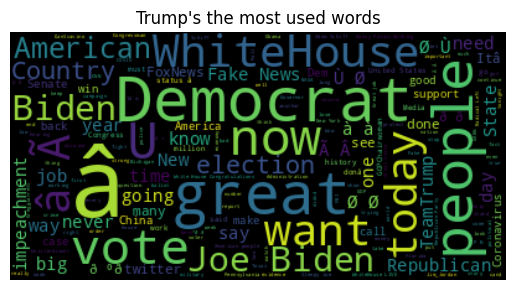

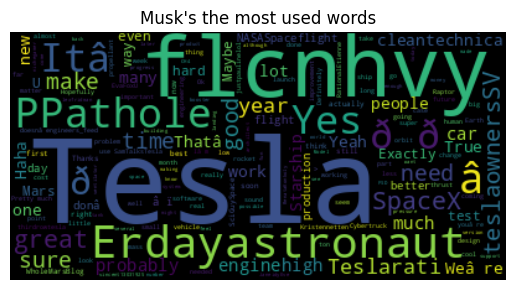

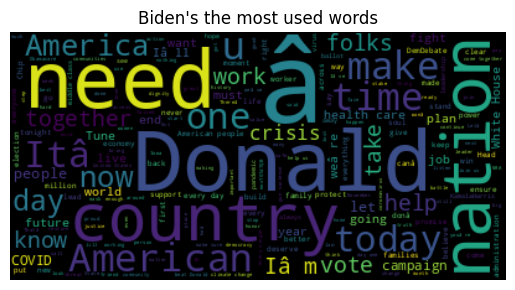

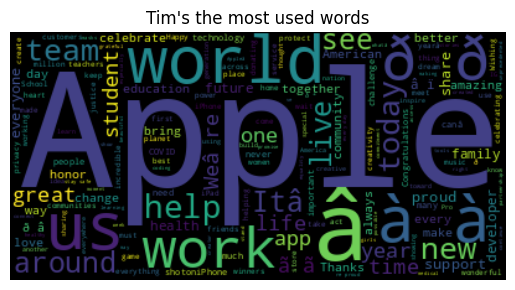

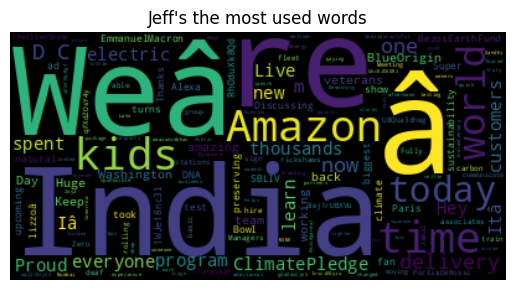

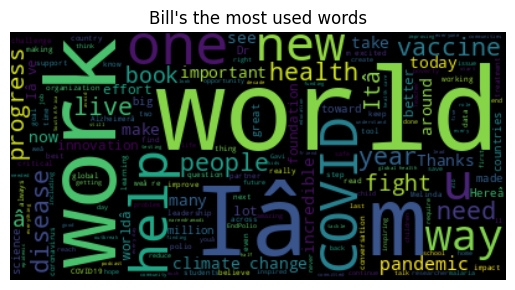

In [19]:
print('2019 - 2020 Word clouds:\n')
generate_word_cloud(trump2019_2020, "Trump's the most used words")
generate_word_cloud(musk2019_2020, "Musk's the most used words")
generate_word_cloud(biden2019_2020, "Biden's the most used words")
generate_word_cloud(tim2019_2020, "Tim's the most used words")
generate_word_cloud(jeff2019_2020, "Jeff's the most used words")
generate_word_cloud(bill2019_2020, "Bill's the most used words")

2022 Word clouds:



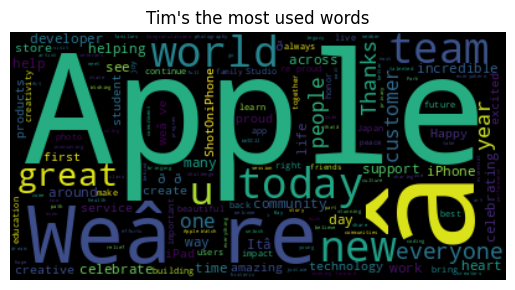

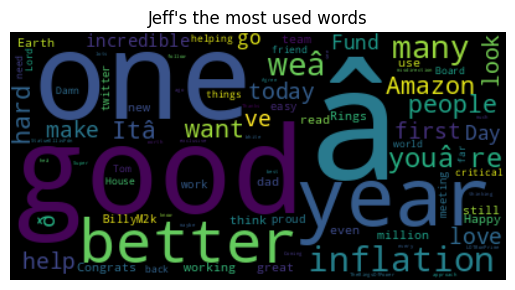

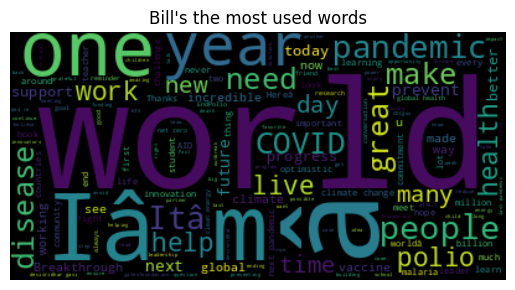

In [20]:
print('2022 Word clouds:\n')
# generate_word_cloud(trump2022, "Trump's the most used words")
# generate_word_cloud(musk2022, "Musk's the most used words")
# generate_word_cloud(biden2022, "Biden's the most used words")
generate_word_cloud(tim2022, "Tim's the most used words")
generate_word_cloud(jeff2022, "Jeff's the most used words")
generate_word_cloud(bill2022, "Bill's the most used words")

In [21]:
# Function to perform sentiment analysis using Vader
def perform_sentiment_analysis(df):
    analyzed_df = df.copy()
    analyzed_df['sentiment'] = ''
    analyzed_df['polarity'] = ''

    # Create an instance of the Vader sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    for index, row in analyzed_df.iterrows():
        tweet = row['tweet']
        sentiment, compound_score = get_sentiment_label(analyzer.polarity_scores(tweet))
        analyzed_df.at[index, 'sentiment'] = sentiment
        analyzed_df.at[index, 'polarity'] = compound_score

    return analyzed_df

# Function to get sentiment label and compound score based on Vader sentiment scores
def get_sentiment_label(sentiment_scores):
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        sentiment_label = 'positive'
    elif compound_score <= -0.05:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    return sentiment_label, compound_score

In [22]:
# Perform sentiment analysis using Vader
analyzed_musk2019_2020 = perform_sentiment_analysis(musk2019_2020)
analyzed_biden2019_2020 = perform_sentiment_analysis(biden2019_2020)
analyzed_trump2019_2020 = perform_sentiment_analysis(trump2019_2020)
analyzed_jeff2019_2020 = perform_sentiment_analysis(jeff2019_2020)
analyzed_tim2019_2020 = perform_sentiment_analysis(tim2019_2020)
analyzed_bill2019_2020 = perform_sentiment_analysis(bill2019_2020)

In [23]:
# # Perform sentiment analysis on the using Vader
# analyzed_musk2022 = perform_sentiment_analysis(musk2022)
# analyzed_biden2022 = perform_sentiment_analysis(biden2022)
# analyzed_trump2022 = perform_sentiment_analysis(trump2022)
analyzed_jeff2022 = perform_sentiment_analysis(jeff2022)
analyzed_tim2022 = perform_sentiment_analysis(tim2022)
analyzed_bill2022 = perform_sentiment_analysis(bill2022)

In [24]:
# # Function to perform sentiment analysis using TextBlob
# def perform_sentiment_analysis(df):
#     analyzed_df = df.copy()
#     analyzed_df['sentiment'] = ''
#     analyzed_df['subjectivity'] = ''
#     analyzed_df['polarity'] = ''

#     for index, row in analyzed_df.iterrows():
#         tweet = row['tweet']
#         sentiment, subjectivity, polarity = get_sentiment_label(TextBlob(tweet).sentiment)
#         analyzed_df.at[index, 'sentiment'] = sentiment
#         analyzed_df.at[index, 'subjectivity'] = subjectivity
#         analyzed_df.at[index, 'polarity'] = polarity

#     return analyzed_df

# # Function to get sentiment label, subjectivity, and polarity based on sentiment score
# def get_sentiment_label(sentiment):
#     polarity = sentiment.polarity
#     subjectivity = sentiment.subjectivity

#     if polarity > 0:
#         sentiment_label = 'positive'
#     elif polarity < 0:
#         sentiment_label = 'negative'
#     else:
#         sentiment_label = 'neutral'

#     return sentiment_label, subjectivity, polarity

# # Perform sentiment analysis on Musk's tweets
# analyzed_musk2019_2020 = perform_sentiment_analysis(musk2019_2020)

# # Perform sentiment analysis on Biden's tweets
# analyzed_biden2019_2020 = perform_sentiment_analysis(biden2019_2020)

# # Perform sentiment analysis on Trump's tweets
# analyzed_trump2019_2020 = perform_sentiment_analysis(trump2019_2020)


In [25]:
# # Function to set color based on sentiment
# def get_color(sentiment):
#     if sentiment == 'negative':
#         return 'red'
#     elif sentiment == 'neutral':
#         return 'gray'
#     elif sentiment == 'positive':
#         return 'blue'

# # Plotting
# plt.figure(figsize=(10, 8))

# # Plot for Musk's, Trump's, and Biden's tweets
# for df in [analyzed_musk2019_2020, analyzed_trump2019_2020, analyzed_biden2019_2020]:
#     for i, row in df.iterrows():
#         polarity = row['polarity']
#         subjectivity = row['subjectivity']
#         sentiment = row['sentiment']
#         color = get_color(sentiment)
#         plt.scatter(polarity, subjectivity, color=color)

# # Set labels and title
# plt.title('Sentiment Analysis of Tweets')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')

# # Show the plot
# plt.show()

In [26]:
# print(analyzed_jeff2019_2020.head())

In [27]:
# Group by the date and calculate the average sentiment for each day
day_grouped_musk2019_2020 = analyzed_musk2019_2020.groupby(analyzed_musk2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_trump2019_2020 = analyzed_trump2019_2020.groupby(analyzed_trump2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_biden2019_2020 = analyzed_biden2019_2020.groupby(analyzed_biden2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_jeff2019_2020 = analyzed_jeff2019_2020.groupby(analyzed_jeff2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_tim2019_2020 = analyzed_tim2019_2020.groupby(analyzed_tim2019_2020['time'].dt.date)['polarity'].mean()
day_grouped_bill2019_2020 = analyzed_bill2019_2020.groupby(analyzed_bill2019_2020['time'].dt.date)['polarity'].mean()

In [28]:
# Group by the date and calculate the average sentiment for each day for Musk's dataset in 2022
# day_grouped_musk2022 = analyzed_musk2022.groupby(analyzed_musk2022['time'].dt.date)['polarity'].mean()
# day_grouped_trump2022 = analyzed_trump2022.groupby(analyzed_trump2022['time'].dt.date)['polarity'].mean()
# day_grouped_biden2022 = analyzed_biden2022.groupby(analyzed_biden2022['time'].dt.date)['polarity'].mean()
day_grouped_jeff2022 = analyzed_jeff2022.groupby(analyzed_jeff2022['time'].dt.date)['polarity'].mean()
day_grouped_tim2022 = analyzed_tim2022.groupby(analyzed_tim2022['time'].dt.date)['polarity'].mean()
day_grouped_bill2022 = analyzed_bill2022.groupby(analyzed_bill2022['time'].dt.date)['polarity'].mean()

In [29]:
sp500_2019_2020['biden'] = day_grouped_biden2019_2020
sp500_2019_2020['musk'] = day_grouped_musk2019_2020
sp500_2019_2020['trump'] = day_grouped_trump2019_2020
sp500_2019_2020['tim'] = day_grouped_tim2019_2020
sp500_2019_2020['bill'] = day_grouped_bill2019_2020
sp500_2019_2020['jeff'] = day_grouped_jeff2019_2020

In [30]:
# sp500_2022['biden'] = day_grouped_biden2022
# sp500_2022['musk'] = day_grouped_musk2022
# sp500_2022['trump'] = day_grouped_trump2022
sp500_2022['tim'] = day_grouped_tim2022
sp500_2022['bill'] = day_grouped_bill2022
sp500_2022['jeff'] = day_grouped_jeff2022

In [31]:
def print_nan_counts(df):
    nan_counts = df.isnull().sum()  # Count NaN values for each column
    for column, count in nan_counts.items():
        print(f"Column '{column}': {count} NaN values")

In [32]:
print('NaN for 2019 - 2020:')
print_nan_counts(sp500_2019_2020)

NaN for 2019 - 2020:
Column 'Adj Close': 0 NaN values
Column 'biden': 45 NaN values
Column 'musk': 21 NaN values
Column 'trump': 0 NaN values
Column 'tim': 190 NaN values
Column 'bill': 164 NaN values
Column 'jeff': 301 NaN values


In [33]:
print('NaN for 2022:')
print_nan_counts(sp500_2022)

NaN for 2022:
Column 'Adj Close': 0 NaN values
Column 'tim': 156 NaN values
Column 'bill': 93 NaN values
Column 'jeff': 208 NaN values


In [34]:
# sp500_2019_2020['biden'] = sp500_2019_2020['biden'].fillna(0)

In [ ]:
df_for_training = sp500_2019_2020[['Adj Close', 'trump']]

# Data scaling for LSTM because it uses sigmoid and tanh that are sensitive to magnitude
scaler = MinMaxScaler()
df_for_training_scaled = scaler.fit_transform(df_for_training)

# Separate scaler for inference on Open and Adj Close columns
scaler_for_inference = MinMaxScaler()
scaler_for_inference.fit(df_for_training[['Adj Close']])

df_for_training_scaled

In [36]:
# As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features.
# Empty lists to be populated using formatted training data
trainX = []  # List to store input sequences
trainY = []  # List to store output values

n_future = 1  # Number of days we want to look into the future based on the past days.
n_past = 2  # Number of past days we want to use to predict the future.

# Reformat input data into a shape: (n_samples x timesteps x n_features)
for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    # Extract the input sequence of past days
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    # Extract the output value (Open and Adj Close) for the future day
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, [0, -2]])

# Convert the lists to numpy arrays
trainX, trainY = np.array(trainX), np.array(trainY)

# Print the shapes of trainX and trainY arrays
print('TrainX shape = {}.'.format(trainX.shape))
print('TrainY shape = {}.'.format(trainY.shape))

TrainX shape = (314, 2, 2).
TrainY shape = (314, 1, 2).


In [37]:
# Train-test split for LSTM without Twitter data
X_train_lstm_without_twitter, X_test_lstm_without_twitter, y_train_lstm_without_twitter, y_test_lstm_without_twitter = train_test_split(trainX[:,:,:-1],
                                                                                                                                        trainY,
                                                                                                                                        test_size=0.2,
                                                                                                                                        shuffle=False)

# Train-test split for LSTM with Twitter data
X_train_lstm_twitter, X_test_lstm_twitter, y_train_lstm_twitter, y_test_lstm_twitter = train_test_split(trainX,
                                                                                                        trainY,
                                                                                                        test_size=0.2,
                                                                                                        shuffle=False)

# Print the shapes of the training data for LSTM without Twitter data and LSTM with Twitter data
print('X_train_lstm_without_twitter shape:', X_train_lstm_without_twitter.shape)
print('X_train_lstm_twitter shape:', X_train_lstm_twitter.shape)

X_train_lstm_without_twitter shape: (251, 2, 1)
X_train_lstm_twitter shape: (251, 2, 2)


In [38]:
# Train-validation split for LSTM without Twitter data
X_train_lstm_without_twitter, X_val_lstm_without_twitter, y_train_lstm_without_twitter, y_val_lstm_without_twitter = train_test_split(X_train_lstm_without_twitter,
                                                                                                                                      y_train_lstm_without_twitter,
                                                                                                                                     test_size=0.1,
                                                                                                                                      shuffle=False)

# Train-validation split for LSTM with Twitter data
X_train_lstm_twitter, X_val_lstm_twitter, y_train_lstm_twitter, y_val_lstm_twitter = train_test_split(X_train_lstm_twitter,
                                                                                                      y_train_lstm_twitter,
                                                                                                      test_size=0.1,
                                                                                                      shuffle=False)

# Print the shapes of the training data for LSTM without Twitter data and LSTM with Twitter data
print('X_train_lstm_without_twitter shape:', X_train_lstm_without_twitter.shape)
print('X_train_lstm_twitter shape:', X_train_lstm_twitter.shape)


X_train_lstm_without_twitter shape: (225, 2, 1)
X_train_lstm_twitter shape: (225, 2, 2)


In [39]:
print('Y_train_lstm_twitter shape:', y_train_lstm_twitter.shape)

Y_train_lstm_twitter shape: (225, 1, 2)


In [40]:
# def build_model(input_shape):
#     tf.random.set_seed(seed)
#     lstm_model = Sequential()

#     # LSTM layers
#     lstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=input_shape))
#     lstm_model.add(Dropout(0.2))
#     lstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
#     lstm_model.add(Dropout(0.2))

#     # Fully connected layers
#     lstm_model.add(Dense(32, activation='relu'))
#     lstm_model.add(Dense(trainY.shape[2], activation='relu'))

#     # Compile the model
#     lstm_model.compile(optimizer='adam', loss='mse')

#     # Print the model summary
#     lstm_model.summary()

#     return lstm_model


In [41]:
X_train_lstm_twitter = X_train_lstm_twitter.reshape((X_train_lstm_twitter.shape[0], X_train_lstm_twitter.shape[1], X_train_lstm_twitter.shape[2]))
y_train_lstm_twitter = y_train_lstm_twitter.reshape((y_train_lstm_twitter.shape[0], 1, y_train_lstm_twitter.shape[1]))


ValueError: ignored

Training model with lstm_units: 64, dropout_rate: 0.2, batch_size: 16
Epoch 12: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 0.0333
Model with lstm_units: 64, dropout_rate: 0.2, batch_size: 16
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_98 (LSTM)              (None, 2, 64)             17152     
                                                                 
 lstm_99 (LSTM)              (None, 64)                33024     
                                                                 
 dense_49 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50,241
Trainable params: 50,241
Non-trainable params: 0
_________________________________________________________________
None
Training time: 5.776994705200195 seconds
Evaluated loss: 0.03327151760458946


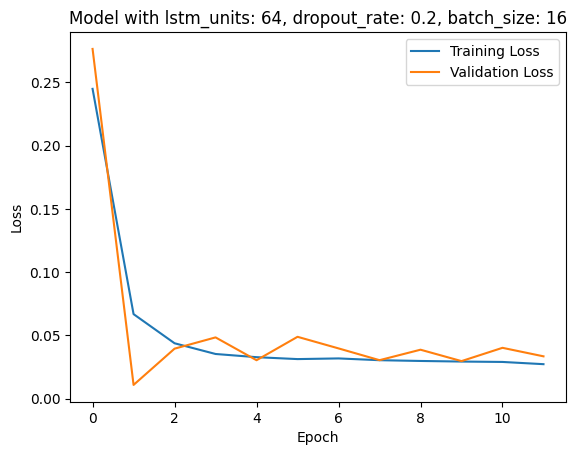

Model stopped early after 12 epochs
Training model with lstm_units: 64, dropout_rate: 0.2, batch_size: 32
Epoch 14: early stopping
1/1 [==============================] - 0s 26ms/step - loss: 0.0248
Model with lstm_units: 64, dropout_rate: 0.2, batch_size: 32
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_100 (LSTM)             (None, 2, 64)             17152     
                                                                 
 lstm_101 (LSTM)             (None, 64)                33024     
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50,241
Trainable params: 50,241
Non-trainable params: 0
_________________________________________________________________
None
Training time: 6.116828918457031 seconds
Evaluate

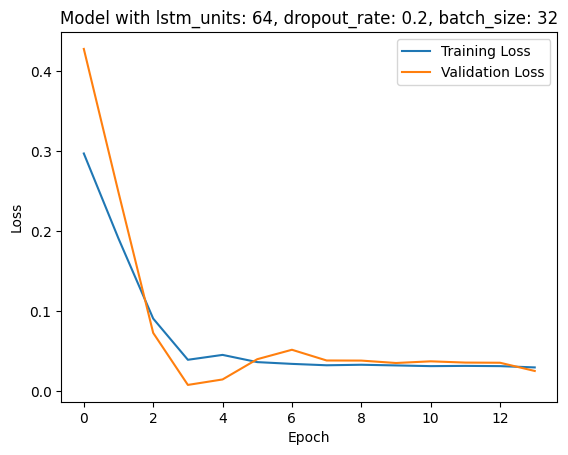

Model stopped early after 14 epochs
Training model with lstm_units: 64, dropout_rate: 0.2, batch_size: 64
Epoch 18: early stopping
1/1 [==============================] - 0s 27ms/step - loss: 0.0316
Model with lstm_units: 64, dropout_rate: 0.2, batch_size: 64
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 2, 64)             17152     
                                                                 
 lstm_103 (LSTM)             (None, 64)                33024     
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                                 
Total params: 50,241
Trainable params: 50,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

# Define a list of LSTM units to try
lstm_units_list = [64, 128, 256]

# Define a list of dropout rates to try
dropout_rates = [0.2, 0.4, 0.6]

# Define a list of batch sizes to try
batch_sizes = [16, 32, 64, 128]

# Variables to keep track of best hyperparameters and model
best_batch_size = None
best_lstm_units = None
best_dropout_rate = None
best_loss = float('inf')
best_model = None
early_stopping_epochs = 10

# Iterate through different hyperparameters
for lstm_units in lstm_units_list:
    for dropout_rate in dropout_rates:
        for batch_size in batch_sizes:
            print(f"Training model with lstm_units: {lstm_units}, dropout_rate: {dropout_rate}, batch_size: {batch_size}")

            # Build and compile the LSTM model
            model = Sequential()
            model.add(LSTM(units=lstm_units, dropout=dropout_rate, return_sequences=True, input_shape=(2, 2)))
            model.add(LSTM(units=lstm_units, dropout=dropout_rate))
            model.add(Dense(units=1))

            model.compile(loss='mse', optimizer='adam')

            # Start the timer
            start_time = time.time()

            # Define early stopping callback
            early_stopping = EarlyStopping(monitor='val_loss', patience=early_stopping_epochs, verbose=1)

            # Train the model with validation data and early stopping
            history = model.fit(X_train_lstm_twitter, y_train_lstm_twitter, epochs=50, batch_size=batch_size,
                                validation_data=(X_val_lstm_twitter, y_val_lstm_twitter), verbose=0,
                                callbacks=[early_stopping])

            # Calculate the training time
            end_time = time.time()
            training_time = end_time - start_time

            # Evaluate the model
            loss = model.evaluate(X_val_lstm_twitter, y_val_lstm_twitter)

            # Print the details of the model
            print(f"Model with lstm_units: {lstm_units}, dropout_rate: {dropout_rate}, batch_size: {batch_size}")
            print(model.summary())
            print(f"Training time: {training_time} seconds")
            print(f"Evaluated loss: {loss}")

            # Plot the training and validation loss over epochs
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f"Model with lstm_units: {lstm_units}, dropout_rate: {dropout_rate}, batch_size: {batch_size}")
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()

            # Check if the current model has the lowest loss
            if loss < best_loss:
                best_loss = loss
                best_batch_size = batch_size
                best_lstm_units = lstm_units
                best_dropout_rate = dropout_rate
                best_model = model

            # Check if the model stopped early
            if len(history.history['val_loss']) < 50:
                stopped_early = len(history.history['val_loss'])
                print(f"Model stopped early after {stopped_early} epochs")

# Print the best hyperparameters and model
print("\nBest Hyperparameters:")
print(f"LSTM Units: {best_lstm_units}")
print(f"Dropout Rate: {best_dropout_rate}")
print(f"Batch Size: {best_batch_size}")
print(f"Best Loss: {best_loss}")
print("\nBest Model Summary:")
print(best_model.summary())


In [42]:

# Define the hyperparameters to search
hyperparameters = {
    'lstm_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
}

# Create all possible parameter combinations
param_grid = ParameterGrid(hyperparameters)

# Prepare your data (replace X_train and y_train with your actual data)
X_train = X_train_lstm_twitter
y_train = y_train_lstm_twitter
X_val = X_val_lstm_twitter
y_val = y_val_lstm_twitter


# Define a function to build and evaluate the LSTM model
def build_lstm_model(lstm_units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units=lstm_units, dropout=dropout_rate, return_sequences=True, input_shape=(2, 2)))
    model.add(LSTM(units=lstm_units, dropout=dropout_rate))
    model.add(Dense(units=1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=20, batch_size=32)
    return model

# Initialize variables to store the best LSTM configuration and its evaluation metric
best_lstm_model = None
best_loss = np.inf

# Iterate through all parameter combinations
for params in param_grid:
    lstm_units = params['lstm_units']
    dropout_rate = params['dropout_rate']

    # Build and evaluate the LSTM model
    lstm_model = build_lstm_model(lstm_units, dropout_rate)
    loss = lstm_model.evaluate(X_val, y_val)  # Evaluate on your validation data

    # Update the best LSTM configuration if the current one has a lower loss
    if loss < best_loss:
        best_loss = loss
        best_lstm_model = lstm_model

# Print the best LSTM configuration and its evaluation metric
print("Best LSTM Configuration:")
print(best_lstm_model.summary())
print("Best Loss: ", best_loss)


Epoch 1/10
8/8 [==============================] - 11s 11ms/step - loss: 0.2735
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.1539
Epoch 3/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0645
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0427
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 0.0464
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0350
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0348
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0327
Epoch 9/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0327
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.0268
Epoch 1/10
8/8 [==============================] - 9s 11ms/step - loss: 0.2671
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0951
Epoch 3/10
8/8 [==============================] - 0s 12ms/step - loss

1/1 [==============================] - 1s 664ms/step - loss: 0.0365
Epoch 1/10
8/8 [==============================] - 4s 6ms/step - loss: 0.2314
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0675
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0508
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0395
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0323
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0308
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0294
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0305


1/1 [==============================] - 1s 692ms/step - loss: 0.0264
Epoch 1/10
8/8 [==============================] - 5s 6ms/step - loss: 0.2768
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.1553
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0678
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0582
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0535
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0444
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0438
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0398
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0383
Epoch 10/10
1/1 [==============================] - 1s 674ms/step - loss: 0.0442
Epoch 1/10
8/8 [==============================] - 4s 6ms/step - loss: 0.2472
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch

In [ ]:
seed = 42

# Build the model without Twitter data
cnn_lstm_model_without_twitter = build_model((X_train_lstm_without_twitter.shape[1],
                                              X_train_lstm_without_twitter.shape[2]))

# Build the model with Twitter data
cnn_lstm_model_twitter = build_model((X_train_lstm_twitter.shape[1],
                                      X_train_lstm_twitter.shape[2]))

# Fit the model without Twitter data
history_without_twitter = cnn_lstm_model_without_twitter.fit(
    X_train_lstm_without_twitter, y_train_lstm_without_twitter,
    epochs=15, batch_size=64,
    validation_data=(X_val_lstm_without_twitter, y_val_lstm_without_twitter),
    verbose=1
)

# Fit the model with Twitter data
history_twitter = cnn_lstm_model_twitter.fit(
    X_train_lstm_twitter, y_train_lstm_twitter,
    epochs=15,
    batch_size=64,
    validation_data=(X_val_lstm_twitter, y_val_lstm_twitter),
    verbose=1
)


In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history_without_twitter.history['loss'], label='Training loss')
plt.plot(history_without_twitter.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss without Twitter sentiment analysis')
plt.legend()

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(history_twitter.history['loss'], label='Training loss')
plt.plot(history_twitter.history['val_loss'], label='Validation loss')
plt.title('Training loss Vs. Validation loss including Twitter sentiment analysis')
plt.legend()

In [ ]:
def plot_predictions_with_dates(type, twitter, dates, y_actual_lstm, y_pred_lstm):
    predicted_features = ['Adj Close']

    for i, predicted_feature in enumerate(predicted_features):
        plt.figure(figsize=(15, 6))

        if twitter:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature after adding Twitter sentiment analysis')
        else:
            plt.title(f'LSTM {type} prediction of {predicted_feature} feature without Twitter sentiment analysis')

        # Plot actual values
        sns.lineplot(x=dates, y=y_actual_lstm[:, i], label='Actual')

        # Plot predicted values
        sns.lineplot(x=dates, y=y_pred_lstm[:, i], label='Predicted')

        plt.show()

        # Calculate and print mean squared error
        error = mean_squared_error(y_actual_lstm[:, i], y_pred_lstm[:, i])
        print(f'Mean squared error for {predicted_feature}: {error}')

In [ ]:
training_dates = df_for_training.index[:X_train_lstm_without_twitter.shape[0]]

# Make predictions using the LSTM model without Twitter sentiment analysis
training_prediction_without_twitter = cnn_lstm_model_without_twitter.predict(X_train_lstm_without_twitter)
training_prediction_without_twitter = training_prediction_without_twitter.reshape(training_prediction_without_twitter.shape[0], -1)

# Make predictions using the LSTM model with Twitter sentiment analysis
training_prediction_twitter = cnn_lstm_model_twitter.predict(X_train_lstm_twitter)
training_prediction_twitter = training_prediction_twitter.reshape(training_prediction_twitter.shape[0], -1)

# Perform inverse scaling to obtain the actual predicted values
y_train_pred_lstm_without_twitter = scaler_for_inference.inverse_transform(training_prediction_without_twitter)
y_train_pred_lstm_twitter = scaler_for_inference.inverse_transform(training_prediction_twitter)

# Reshape the actual training data for inverse scaling
y_train_lstm_reshaped_without_twitter = y_train_lstm_without_twitter.reshape(y_train_lstm_without_twitter.shape[0], y_train_lstm_without_twitter.shape[2])

# Perform inverse scaling to obtain the actual training values
y_train_actual_lstm = scaler_for_inference.inverse_transform(y_train_lstm_reshaped_without_twitter)


In [ ]:
plot_predictions_with_dates('Training',False,training_dates,y_train_actual_lstm,y_train_pred_lstm_without_twitter)

In [ ]:
plot_predictions_with_dates('Training',1,training_dates,y_train_actual_lstm,y_train_pred_lstm_twitter)